In [1]:
import eeweather as ee
import json
import datetime
import pytz

#http://eeweather.openee.io/en/latest/basics.html
#https://github.com/openeemeter/eeweather/blob/master/scripts/tutorial.ipynb

In [2]:
zip_code = '92602'

In [3]:
lat, lng = ee.zcta_to_lat_long(zip_code)
lat, lng

(33.7458602672367, -117.748639071815)

In [4]:
#Produces a list of stations that are close to the zip code of choice. 
# This is a Pandas dataframe that can be indexed worked with as a normal Pandas object.

ranked_stations = ee.rank_stations(lat, lng)
ranked_stations.head()

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722908,1,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,117.0,CA,None,False,False,None
690140,2,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,116.7,CA,None,False,False,None
722915,3,9327.882167,33.700,-117.833,3,B,Hot-Dry,CA_08,low,16.5,CA,None,False,False,None
722977,4,13103.802968,33.680,-117.866,3,B,Hot-Dry,CA_06,high,16.5,CA,II,True,True,None
722973,5,20251.918171,33.600,-117.880,3,B,Hot-Dry,None,low,3.0,CA,None,False,False,None


In [5]:
#Use boolean indexing to sift through a dataframe.  

ranked_stations[ranked_stations['elevation'] > 200].head(10)

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722869,12,36660.564922,33.952,-117.439,3,B,Hot-Dry,CA_10,high,245.2,CA,II,True,True,None
722865,13,36770.673069,34.067,-117.650,3,B,Hot-Dry,CA_10,low,303.9,CA,None,False,False,None
747040,14,37046.252014,34.056,-117.600,3,B,Hot-Dry,CA_10,high,289.3,CA,None,False,False,None
722887,19,39409.819219,34.100,-117.783,3,B,Hot-Dry,CA_09,low,308.2,CA,None,False,False,None
720329,21,40997.817231,34.112,-117.688,3,B,Hot-Dry,CA_10,low,438.6,CA,None,False,False,None
722860,27,49226.364427,33.900,-117.250,3,B,Hot-Dry,CA_10,high,468.2,CA,II,True,True,None
749169,31,55737.702078,34.133,-118.133,3,B,Hot-Dry,CA_09,low,231.0,CA,None,False,False,None
722866,36,61283.626016,34.095,-117.235,3,B,Hot-Dry,CA_10,low,353.3,CA,None,False,False,None
722890,37,61522.262308,34.233,-118.067,3,B,Hot-Dry,CA_16,low,1739.2,CA,None,False,False,None


In [6]:
ranked_stations.head()

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722908,1,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,117.0,CA,None,False,False,None
690140,2,8866.283228,33.667,-117.733,3,B,Hot-Dry,CA_08,low,116.7,CA,None,False,False,None
722915,3,9327.882167,33.700,-117.833,3,B,Hot-Dry,CA_08,low,16.5,CA,None,False,False,None
722977,4,13103.802968,33.680,-117.866,3,B,Hot-Dry,CA_06,high,16.5,CA,II,True,True,None
722973,5,20251.918171,33.600,-117.880,3,B,Hot-Dry,None,low,3.0,CA,None,False,False,None


In [7]:
lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
station

ISDStation('722874')

In [8]:
station.json()

{'climate_zones': {'ba_climate_zone': 'Hot-Dry',
  'ca_climate_zone': 'CA_08',
  'iecc_climate_zone': '3',
  'iecc_moisture_regime': 'B'},
 'elevation': 54.6,
 'icao_code': 'KCQT',
 'latitude': 34.024,
 'longitude': -118.291,
 'name': 'DOWNTOWN L.A./USC CAMPUS',
 'quality': 'high',
 'recent_wban_id': '93134',
 'wban_ids': ['93134']}

In [9]:
station.json()['name']

'DOWNTOWN L.A./USC CAMPUS'

In [10]:
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

In [11]:
temp_c = station.load_cz2010_hourly_temp_data(start_date, end_date)
temp_f = temp_c * 1.8 + 32 

In [33]:
usc_df = temp_f.to_frame(name='temp_f')
usc_df.head(10)

,temp_f
2017-01-01 00:00:00+00:00,59.00
2017-01-01 01:00:00+00:00,57.92
2017-01-01 02:00:00+00:00,57.92
2017-01-01 03:00:00+00:00,57.02
2017-01-01 04:00:00+00:00,55.94
2017-01-01 05:00:00+00:00,55.94
2017-01-01 06:00:00+00:00,53.06
2017-01-01 07:00:00+00:00,53.06
2017-01-01 08:00:00+00:00,44.06
2017-01-01 09:00:00+00:00,42.98


In [37]:
#Send hourly data from dataframe to a CSV file. 

usc_df.to_csv('t2017_eeweather_91755_cz2010.csv', sep=',', encoding='utf-8')

In [13]:
import eeweather as ee
import json
import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
lat, lng = ee.zcta_to_lat_long('92602')
lat, lng

(33.7458602672367, -117.748639071815)

In [15]:
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
station

ISDStation('722977')

In [16]:
station.json()['name']

'J. WAYNE APT-ORANGE CO APT'

In [17]:
start_date = datetime.datetime(2018, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2018, 12, 31, tzinfo=pytz.UTC)

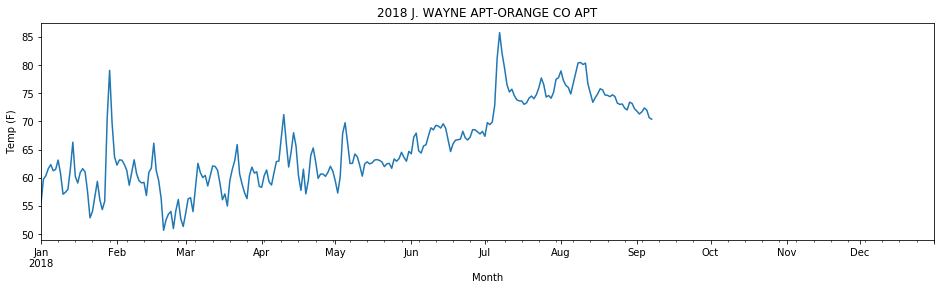

In [18]:
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2018 " + station.json()['name'])
plt.show()

In [19]:
irvine_18_df = temp_F.to_frame(name='temp_F').head(10)
irvine_18_df

,temp_F
2018-01-01 00:00:00+00:00,55.38092
2018-01-02 00:00:00+00:00,59.73314
2018-01-03 00:00:00+00:00,60.35720
2018-01-04 00:00:00+00:00,61.62530
2018-01-05 00:00:00+00:00,62.33054
2018-01-06 00:00:00+00:00,61.24190
2018-01-07 00:00:00+00:00,61.50128
2018-01-08 00:00:00+00:00,63.13226
2018-01-09 00:00:00+00:00,60.72278
2018-01-10 00:00:00+00:00,57.07598


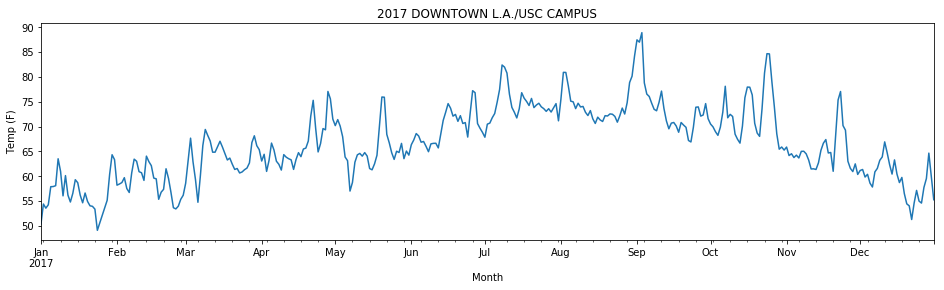

In [20]:
lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [21]:
usc_df = temp_F.to_frame(name='temp_F').head(10)
usc_df

,temp_F
2017-01-01 00:00:00+00:00,50.33966
2017-01-02 00:00:00+00:00,54.38750
2017-01-03 00:00:00+00:00,53.55356
2017-01-04 00:00:00+00:00,54.23882
2017-01-05 00:00:00+00:00,57.87644
2017-01-06 00:00:00+00:00,57.90560
2017-01-07 00:00:00+00:00,58.08038
2017-01-08 00:00:00+00:00,63.50180
2017-01-09 00:00:00+00:00,60.95732
2017-01-10 00:00:00+00:00,56.03252


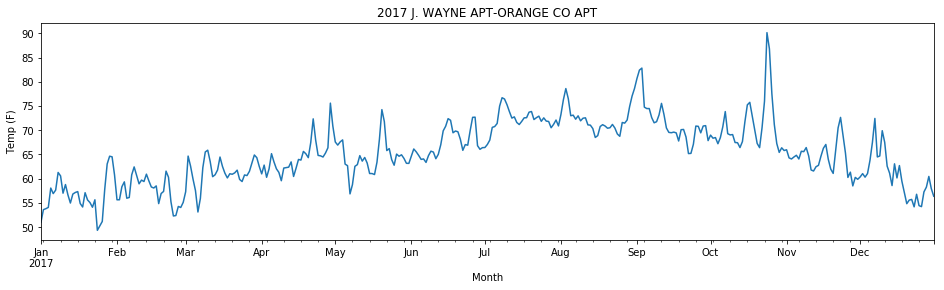

In [22]:
lat, lng = ee.zcta_to_lat_long('92602')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [23]:
irvine_df = temp_F.to_frame(name='temp_F').head(10)
irvine_df

,temp_F
2017-01-01 00:00:00+00:00,50.98172
2017-01-02 00:00:00+00:00,53.58920
2017-01-03 00:00:00+00:00,53.79512
2017-01-04 00:00:00+00:00,54.05756
2017-01-05 00:00:00+00:00,58.05464
2017-01-06 00:00:00+00:00,56.90732
2017-01-07 00:00:00+00:00,57.63038
2017-01-08 00:00:00+00:00,61.27196
2017-01-09 00:00:00+00:00,60.56006
2017-01-10 00:00:00+00:00,56.99480


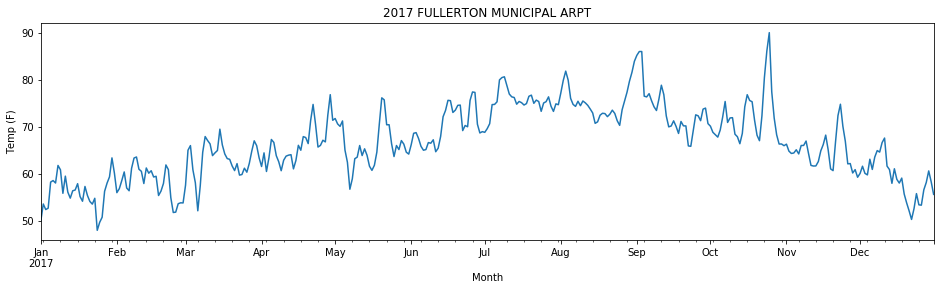

In [24]:
lat, lng = ee.zcta_to_lat_long('91744')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [25]:
fullerton_df = temp_F.to_frame(name='temp_F').head(10)
fullerton_df

,temp_F
2017-01-01 00:00:00+00:00,49.98830
2017-01-02 00:00:00+00:00,53.57066
2017-01-03 00:00:00+00:00,52.38680
2017-01-04 00:00:00+00:00,52.68272
2017-01-05 00:00:00+00:00,58.22438
2017-01-06 00:00:00+00:00,58.55216
2017-01-07 00:00:00+00:00,58.03016
2017-01-08 00:00:00+00:00,61.76066
2017-01-09 00:00:00+00:00,60.83942
2017-01-10 00:00:00+00:00,55.84028


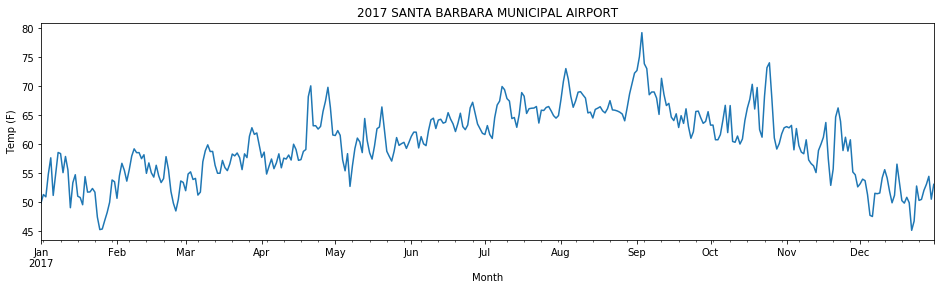

In [26]:
lat, lng = ee.zcta_to_lat_long('93101')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [27]:
sb_df = temp_F.to_frame(name='temp_F').head(10)
sb_df

,temp_F
2017-01-01 00:00:00+00:00,49.86968
2017-01-02 00:00:00+00:00,51.34964
2017-01-03 00:00:00+00:00,50.95526
2017-01-04 00:00:00+00:00,54.84650
2017-01-05 00:00:00+00:00,57.67988
2017-01-06 00:00:00+00:00,51.20006
2017-01-07 00:00:00+00:00,54.84722
2017-01-08 00:00:00+00:00,58.59932
2017-01-09 00:00:00+00:00,58.40726
2017-01-10 00:00:00+00:00,55.12028


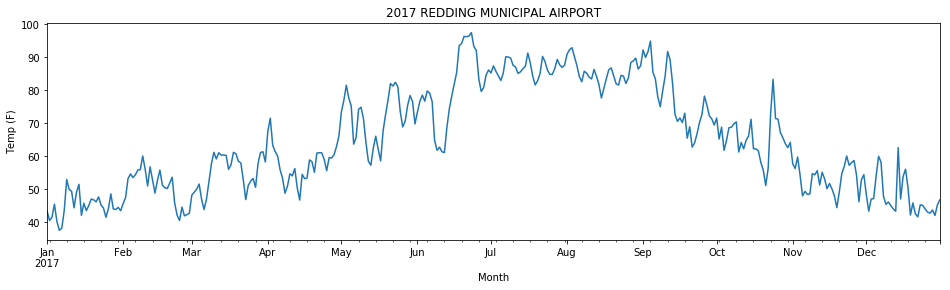

In [28]:
lat, lng = ee.zcta_to_lat_long('96001')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [29]:
redding_df = temp_F.to_frame(name='temp_F').head(10)
redding_df

,temp_F
2017-01-01 00:00:00+00:00,43.44062
2017-01-02 00:00:00+00:00,40.56224
2017-01-03 00:00:00+00:00,41.50778
2017-01-04 00:00:00+00:00,45.49172
2017-01-05 00:00:00+00:00,40.28396
2017-01-06 00:00:00+00:00,37.58036
2017-01-07 00:00:00+00:00,38.23088
2017-01-08 00:00:00+00:00,43.61180
2017-01-09 00:00:00+00:00,52.97144
2017-01-10 00:00:00+00:00,49.95464


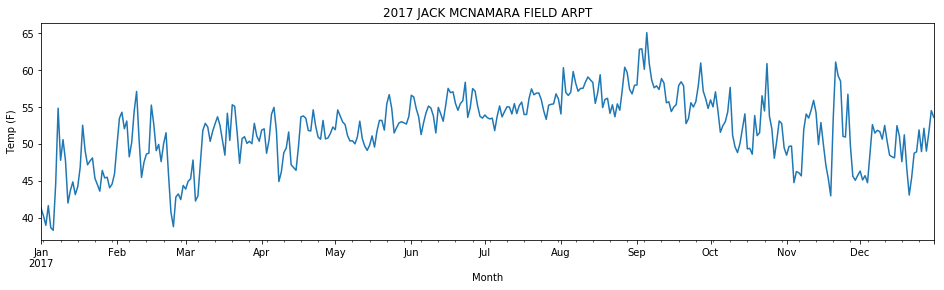

In [30]:
lat, lng = ee.zcta_to_lat_long('95531')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [31]:
cc_df = temp_F.to_frame(name='temp_F').head(10)
cc_df

,temp_F
2017-01-01 00:00:00+00:00,41.30114
2017-01-02 00:00:00+00:00,40.25444
2017-01-03 00:00:00+00:00,38.94476
2017-01-04 00:00:00+00:00,41.61164
2017-01-05 00:00:00+00:00,38.62238
2017-01-06 00:00:00+00:00,38.26364
2017-01-07 00:00:00+00:00,44.49524
2017-01-08 00:00:00+00:00,54.85586
2017-01-09 00:00:00+00:00,47.77808
2017-01-10 00:00:00+00:00,50.58104
